# Day 1

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### Carregando base de dados

In [27]:
df = pd.read_csv("CEAPS_2008_2019.csv")

### Visualizando o tipo de variável de cada atributo

In [28]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268899 entries, 0 to 268898
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ANO                268899 non-null  int64  
 1   MES                268899 non-null  int64  
 2   SENADOR            268899 non-null  object 
 3   TIPO_DESPESA       268899 non-null  object 
 4   CNPJ_CPF           265755 non-null  object 
 5   FORNECEDOR         265755 non-null  object 
 6   DOCUMENTO          246750 non-null  object 
 7   DATA               265755 non-null  object 
 8   DETALHAMENTO       154368 non-null  object 
 9   VALOR_REEMBOLSADO  268897 non-null  float64
dtypes: float64(1), int64(2), object(7)
memory usage: 20.5+ MB


### Visualizando 10 linhas aleatórias

In [29]:
df.sample(10)

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
45671,2011,12,HUMBERTO COSTA,"Passagens aéreas, aquáticas e terrestres nacio...",02.012.862/0001-60,TAM Linhas Aéreas S/A,9572439101001,16/12/2011,Passageiro: Yvez Zamboni - Assessor - Matrícul...,522.90
72172,2012,6,FLEXA RIBEIRO,"Aluguel de imóveis para escritório político, c...",40.432.544/0241-60,CLARO S/A,NaN,10/06/2012,NaN,107.04
184258,2016,9,LÍDICE DA MATA,"Aluguel de imóveis para escritório político, c...",02.559.207/0001-26,FMG EMPREENDIMENTOS E PARTICIPAÇÕES LTDA.,NaN,01/09/2016,PAGAMENTO DO IPTU REFERENTE AO ESCRITÓRIO DE A...,426.45
34749,2010,3,RENATO CASAGRANDE,"Aluguel de imóveis para escritório político, c...",02.449.992/0081-49,VIVO S.A.,118014,20/03/2010,NaN,100.77
17411,2009,12,SÉRGIO ZAMBIASI,"Locomoção, hospedagem, alimentação, combustíve...",00.355.670/0001-20,POSTO COMBS PEGASUS,273682,06/12/2009,NaN,132.00
63277,2012,2,ALOYSIO NUNES FERREIRA,"Passagens aéreas, aquáticas e terrestres nacio...",07.575.651/0001-59,GOL LINHAS AÉREAS,969-0001165074,01/02/2012,VIAGEM REALIZADA PELO SENADOR ALOYSIO NUNES FE...,1026.70
32572,2010,11,NEUTO DE CONTO,"Aluguel de imóveis para escritório político, c...",08.336.783/0001-90,CELESC,012010517800367-94,03/11/2010,NaN,46.51
143940,2014,12,ZEZÉ PERRELLA,"Locomoção, hospedagem, alimentação, combustíve...",03.763.808/0003-80,Moura Combustiveis de Aviação Ltda,000000804,16/12/2014,Abastecimento da Aeronave do Senador Zezé Perr...,1211.18
115326,2013,5,RANDOLFE RODRIGUES,"Passagens aéreas, aquáticas e terrestres nacio...",07.575.651/0001-59,GOL LINHAS AEREAS SA,127-0001594192,10/05/2013,RANDOLPH ALVES 10/05/2013 BSB/RJ G3 1485,397.03
238260,2018,5,MARTA SUPLICY,"Locomoção, hospedagem, alimentação, combustíve...",18.145.772/0018-25,BONJARDIM PAULISTA COM. DE ALIMENTOS LTDA,654,10/05/2018,ALIMENTAÇÃO EM COMPROMISSO DE NATUREZA PARLAME...,125.40


### Excluindo o atributo Documentos

In [30]:
df.drop('DOCUMENTO', axis=1, inplace=True) 

### verificando valores nulos 

In [31]:
df.isnull().any()

ANO                  False
MES                  False
SENADOR              False
TIPO_DESPESA         False
CNPJ_CPF              True
FORNECEDOR            True
DATA                  True
DETALHAMENTO          True
VALOR_REEMBOLSADO     True
dtype: bool

In [32]:
df.CNPJ_CPF = df.CNPJ_CPF.fillna('Nao Informado')
df.FORNECEDOR = df.FORNECEDOR.fillna('Nao Informado')
df.DETALHAMENTO = df.DETALHAMENTO.fillna('Nao Informado')
df.DATA = df.DATA.fillna('Nao Informado')

In [33]:
df[df['VALOR_REEMBOLSADO'].isnull()]

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
149869,2015,8,EDUARDO AMORIM,"Passagens aéreas, aquáticas e terrestres nacio...",13.353.495/0001-84,PROPAGTUR - Propag Turismo Ltda,"Companhia Aérea: TAM, Localizador: YXGDSJ. Pas...","469,53",NaN
149876,2015,8,EDUARDO AMORIM,"Passagens aéreas, aquáticas e terrestres nacio...",13.353.495/0001-84,PROPAGTUR - Propag Turismo Ltda,"Companhia Aérea: AVIANCA, Localizador: ZNEU9F....","460,45",NaN


In [34]:
df.loc[[149869],'VALOR_REEMBOLSADO']=df.loc[[149869],'VALOR_REEMBOLSADO'].replace(NaN, 469.53)
df.loc[[149876],'VALOR_REEMBOLSADO']=df.loc[[149876],'VALOR_REEMBOLSADO'].replace(NaN, 460.45)

In [35]:
df.loc[[149869,149876]]


,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
149869,2015,8,EDUARDO AMORIM,"Passagens aéreas, aquáticas e terrestres nacio...",13.353.495/0001-84,PROPAGTUR - Propag Turismo Ltda,"Companhia Aérea: TAM, Localizador: YXGDSJ. Pas...","469,53",469.53
149876,2015,8,EDUARDO AMORIM,"Passagens aéreas, aquáticas e terrestres nacio...",13.353.495/0001-84,PROPAGTUR - Propag Turismo Ltda,"Companhia Aérea: AVIANCA, Localizador: ZNEU9F....","460,45",460.45


In [36]:
df.isnull().any()

ANO                  False
MES                  False
SENADOR              False
TIPO_DESPESA         False
CNPJ_CPF             False
FORNECEDOR           False
DATA                 False
DETALHAMENTO         False
VALOR_REEMBOLSADO    False
dtype: bool

In [37]:
df[df['VALOR_REEMBOLSADO']<0]

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
162849,2015,1,RANDOLFE RODRIGUES,"Passagens aéreas, aquáticas e terrestres nacio...",02.012.862/0001-60,Tam Linhas Aereas S/A,28/01/2015,"9572100929351 - R$ 1.298,93 (1º bilhete emitid...",-9.0
200967,2017,5,DÁRIO BERGER,"Contratação de consultorias, assessorias, pesq...",73.228.876/0001-63,TV CLIPAGEM LTDA. EPP.,02/06/2017,Despesa com Monitoramento de Informação Jornal...,-243.4


### Convertendo os valores negativos para valores absolutos

In [38]:
df['VALOR_REEMBOLSADO'] = abs(df['VALOR_REEMBOLSADO'])

# Day 2

### Vendo colunas

In [39]:
df.columns


Index(['ANO', 'MES', 'SENADOR', 'TIPO_DESPESA', 'CNPJ_CPF', 'FORNECEDOR',
       'DATA', 'DETALHAMENTO', 'VALOR_REEMBOLSADO'],
      dtype='object')

### Evolução dos gastos ao longo dos anos

<AxesSubplot:title={'center':'Gastos Totais por Ano'}, xlabel='ANO'>

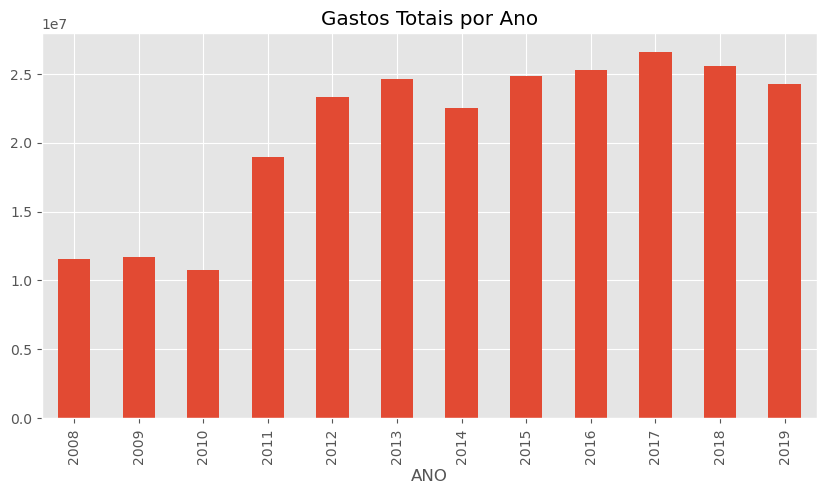

In [40]:
# Gastos totais por ano
gastos_ano = df.groupby("ANO")["VALOR_REEMBOLSADO"].sum()

gastos_ano.plot(kind="bar", figsize=(10,5), title="Gastos Totais por Ano")


### Tipos de depesas mais gastos


In [41]:
# Agrupar os gastos por tipo de despesa e pegar os top 10
despesas_top10 = (
    df.groupby("TIPO_DESPESA")["VALOR_REEMBOLSADO"]
      .sum()
      .sort_values(ascending=False)
      .head(10)
      .reset_index()  # Para transformar em DataFrame e poder usar .style
)

# Formatar os valores em moeda brasileira
despesas_top10.style.format({"VALOR_REEMBOLSADO": "R${:,.2f}"})


,TIPO_DESPESA,VALOR_REEMBOLSADO
0,"Locomoção, hospedagem, alimentação, combustíveis e lubrificantes","R$64,056,430.15"
1,"Passagens aéreas, aquáticas e terrestres nacionais","R$56,389,146.80"
2,"Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.","R$47,922,809.61"
3,"Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar","R$37,193,503.29"
4,Divulgação da atividade parlamentar,"R$31,828,000.34"
5,"Aquisição de material de consumo para uso no escritório político, inclusive aquisição ou locação de software, despesas postais, aquisição de publicações, locação de móveis e de equipamentos.","R$9,806,573.89"
6,Serviços de Segurança Privada,"R$2,995,828.11"


### Meses com mais gastos

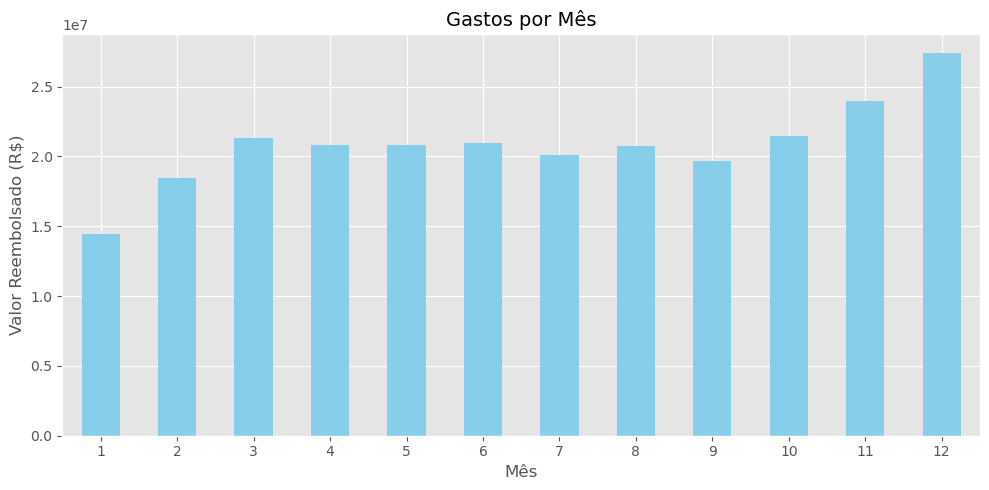

In [42]:
# Agrupar gastos por mês
gastos_mes = df.groupby("MES")["VALOR_REEMBOLSADO"].sum()

# Plot simples e limpo
plt.figure(figsize=(10,5))
gastos_mes.plot(kind="bar", color="skyblue")
plt.title("Gastos por Mês", fontsize=14)
plt.xlabel("Mês")
plt.ylabel("Valor Reembolsado (R$)")
plt.xticks(rotation=0)  # Deixa os meses na horizontal
plt.tight_layout()
plt.show()


### Maiores gastadores (parlamentares)

In [43]:
# Top 10 senadores que mais gastaram no período todo
top_gastadores = (
    df.groupby("SENADOR")["VALOR_REEMBOLSADO"]
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

top_gastadores


SENADOR
FERNANDO COLLOR       4003025.92
SÉRGIO PETECÃO        3879296.95
VANESSA GRAZZIOTIN    3862755.80
CIRO NOGUEIRA         3852571.98
ROMERO JUCÁ           3839386.45
PAULO PAIM            3786962.67
VALDIR RAUPP          3647510.60
HUMBERTO COSTA        3559354.26
RANDOLFE RODRIGUES    3469393.37
JOÃO CAPIBERIBE       3452652.17
Name: VALOR_REEMBOLSADO, dtype: float64

<AxesSubplot:title={'center':'Top 10 Senadores que Mais Gastaram'}, xlabel='SENADOR'>

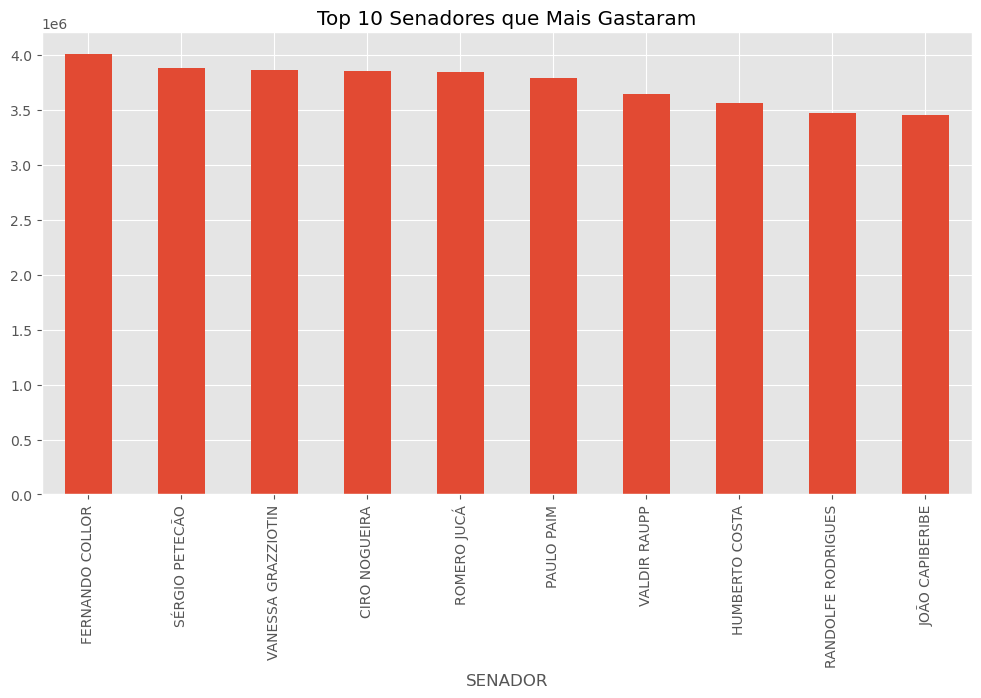

In [44]:
top_gastadores.plot(kind="bar", figsize=(12,6), title="Top 10 Senadores que Mais Gastaram")


### Categoria de despesas 

In [45]:
# Gastos por tipo de despesa
categorias = df.groupby("TIPO_DESPESA")["VALOR_REEMBOLSADO"].sum().sort_values(ascending=False)
categorias


TIPO_DESPESA
Locomoção, hospedagem, alimentação, combustíveis e lubrificantes                                                                                                                                   64056430.15
Passagens aéreas, aquáticas e terrestres nacionais                                                                                                                                                 56389146.80
Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.                                                                                                           47922809.61
Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar                                                             37193503.29
Divulgação da atividade parlamentar                                                                                                                            

### Boxplot dos gastos


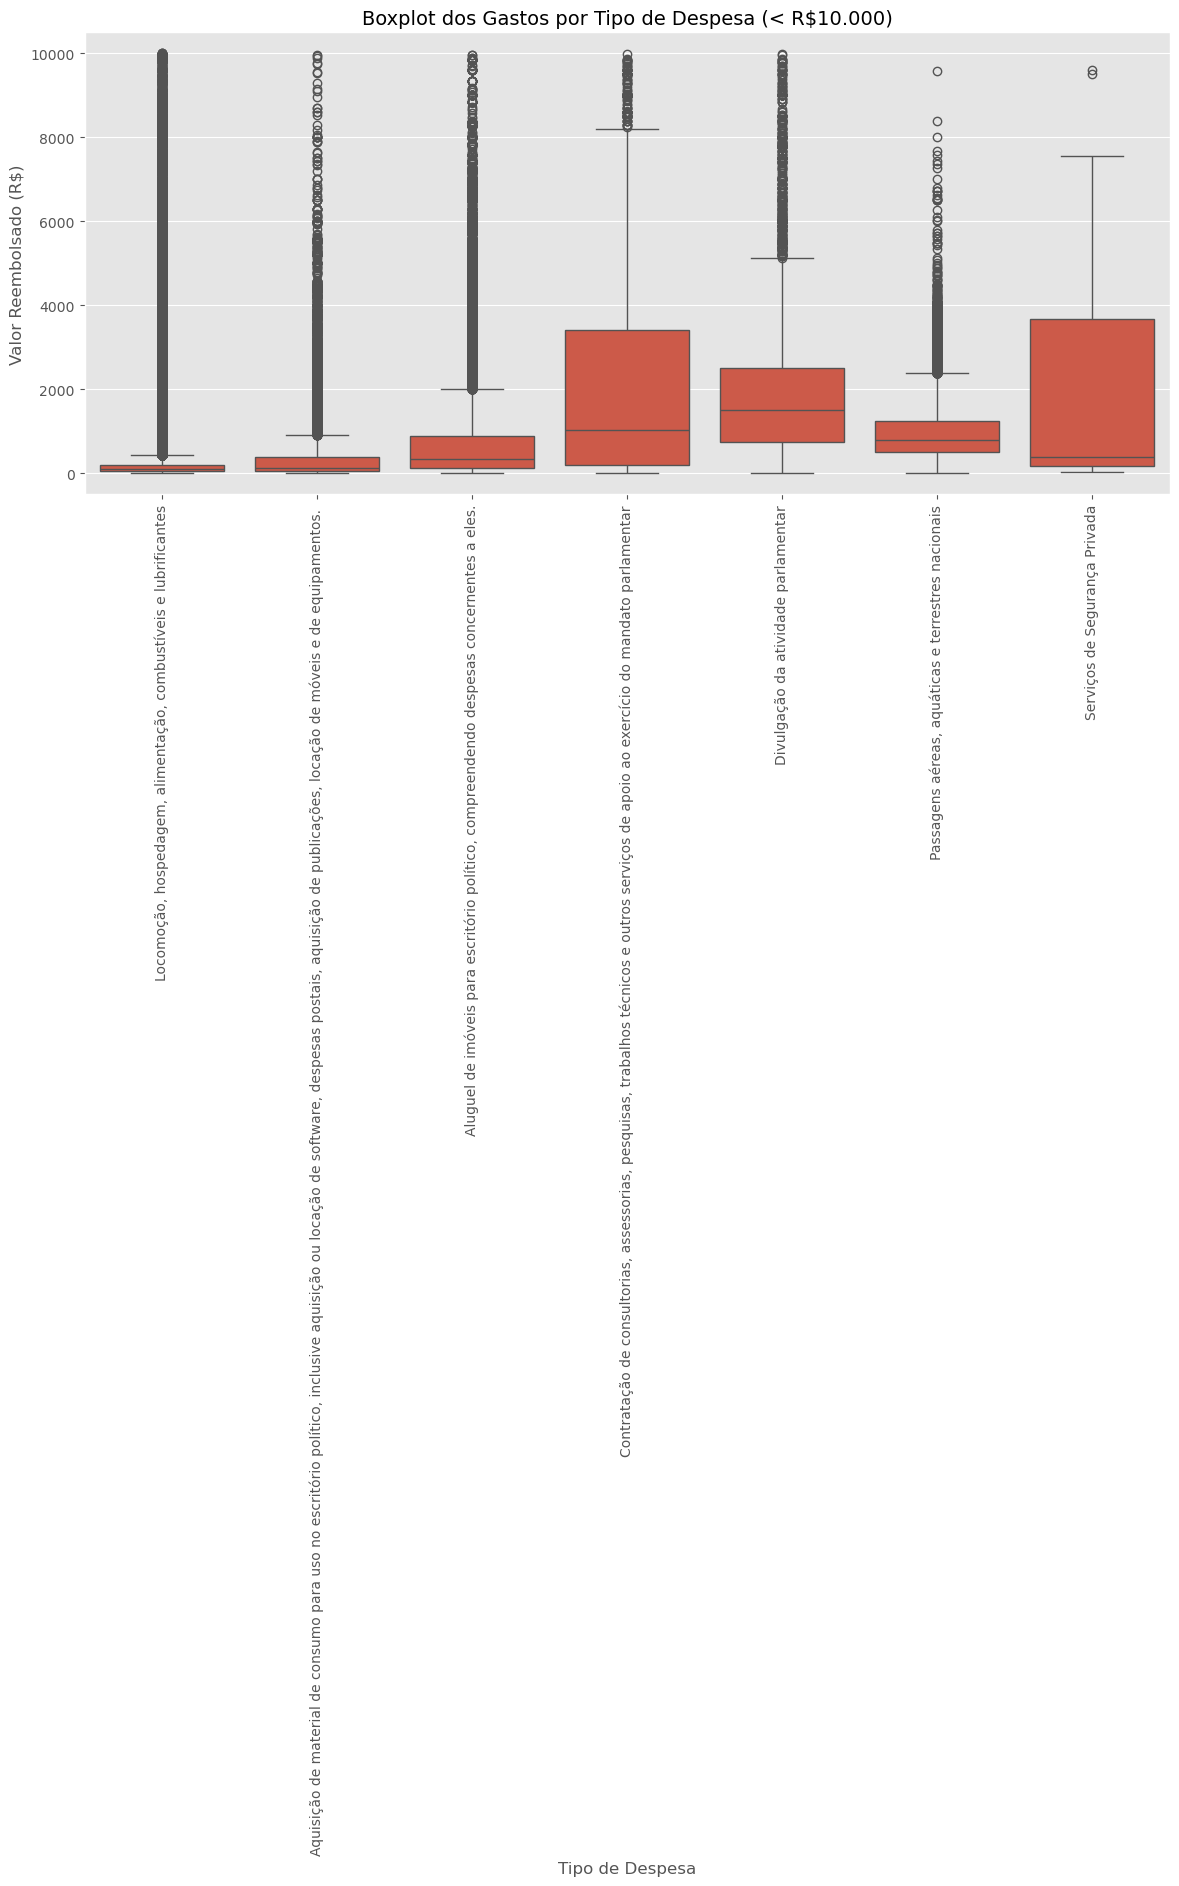

In [46]:
plt.figure(figsize=(14,6))
sns.boxplot(x="TIPO_DESPESA", y="VALOR_REEMBOLSADO", data=df[df["VALOR_REEMBOLSADO"] < 10000])
plt.title("Boxplot dos Gastos por Tipo de Despesa (< R$10.000)", fontsize=14)
plt.ylabel("Valor Reembolsado (R$)")
plt.xlabel("Tipo de Despesa")
plt.xticks(rotation=90)
plt.show()


### Quantos anos de mandato cada senador exerceu


In [47]:
df_mandato = df[['SENADOR','ANO']].drop_duplicates()
df_mandato = df_mandato.groupby('SENADOR').count()
df_mandato.rename(columns={'ANO': 'ANOS_MANDATO'}).sample(20) #Exemplo com 20 candidatos aleatórios

,ANOS_MANDATO
SENADOR,
ELIZIANE GAMA,1
JOSÉ MEDEIROS,5
LÍDICE DA MATA,9
PLÍNIO VALÉRIO,1
IVO CASSOL,9
WEVERTON ROCHA,1
PASTOR VALADARES,2
MARIA DO CARMO ALVES,12
BENEDITO DE LIRA,9


### principais medidas estatisticas

In [49]:
# Selecionar apenas as colunas numéricas
numericas = df.select_dtypes(include=[np.number])

# Estatísticas básicas
estatisticas = numericas.describe().T

# Adicionar medidas extras
estatisticas["variance"] = numericas.var()
estatisticas["skewness"] = numericas.skew()
estatisticas["kurtosis"] = numericas.kurt()
estatisticas["sem"] = numericas.sem()

# Calcular MAD manualmente: média do valor absoluto (x - média)
estatisticas["mad"] = numericas.apply(lambda x: np.mean(np.abs(x - np.mean(x))))

# Exibir resultado
print(estatisticas)



                      count         mean          std      min      25%  \
ANO                268899.0  2014.099413     3.022301  2008.00  2012.00   
MES                268899.0     6.651040     3.282404     1.00     4.00   
VALOR_REEMBOLSADO  268899.0   930.432215  2453.959025     0.01    99.71   

                       50%     75%       max      variance   skewness  \
ANO                2014.00  2017.0    2019.0  9.134306e+00  -0.040260   
MES                   7.00     9.0      12.0  1.077418e+01  -0.008552   
VALOR_REEMBOLSADO   251.97   900.0  270000.0  6.021915e+06  22.766693   

                      kurtosis       sem          mad  
ANO                  -1.100497  0.005828     2.603738  
MES                  -1.144728  0.006330     2.834664  
VALOR_REEMBOLSADO  1532.922328  4.732305  1032.553016  


# Day 3